In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [4]:
!pip install openpyxl

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
     |████████████████████████████████| 249 kB 1.5 MB/s eta 0:00:01


### Lendo os dados

In [5]:
tttplots = pd.read_excel('./codificacao_resultados.xlsx', sheet_name='tttplots')
performance = pd.read_excel('./codificacao_resultados.xlsx', sheet_name='performance_profile')

### ttt plots

In [34]:
# Precisamos fixar uma instância e uma técnica para fazer o gráfico
# Selecionei até a instância 100, então temos 5 instâncias + 3 técnicas = 15 gráficos
# Nas avaliações, vamos utilizar as seguintes métricas:
  # 1. Qualidade da solução: Média dos 5% valores mais altos (objetivo: quero avaliar quantas vezes o algoritmo atingiu o melhor valor)
  # 2. Convergência: Tempo até alcançar a média dos valores (objetivo: quero avaliar o tempo até uma solução fácil)
  # 3. Robustez: Tempo até alcançar a mediana dos valores (objetivo: tempo até alcançar um bom resultado)
# * se os valores de convergência e robustez forem muito parecidos, alterar a métrica

In [6]:
def ecdf(data, array: bool=True):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    if not array:
        return pd.DataFrame({'x': x, 'y': y})
    else:
        return x, y

def tttplots_graph(data, title, n_bins, x_label):
  fig = plt.figure(figsize=(9, 4), layout="constrained")
  #axs = fig.subplots(1, 2, sharex=True, sharey=True)
  sigma = np.var(data)
  mu = np.mean(data)

  # Cumulative distributions.
  x, y = ecdf(data)

  plt.plot(x, y, marker='.', color='tab:blue', label='CDF')
  n, bins, patches = plt.hist(data, n_bins, density=True, histtype="step",
                               cumulative=True, label="Cumulative histogram")
  x = np.linspace(data.min(), data.max())
  y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (x - mu))**2))
  y = y.cumsum()
  y /= y[-1]
  plt.plot(x, y, "k--", linewidth=1.5, label="Theory")

  # Label the figure.
  fig.suptitle(title)
  plt.grid(True)
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel("Cumulative probability")

  return plt.plot()

In [8]:
tttplots.loc[(tttplots['instancia'] == 'kbf020') & (tttplots['algoritmo'] == 'grasp')]['valor_qualidade']

0      1
1      1
2      1
3      1
4      1
5      3
6      3
7      3
8      3
9      4
10     5
11     6
12     7
13     8
14     9
15    10
16    11
17    12
18    13
19    14
20    15
21    16
22    17
23    18
24    19
25    19
26    19
27    19
28    19
29    19
30    20
31    21
32    22
33    23
34    24
35    25
36    26
37    27
38    28
39    29
40    30
41    31
42    32
43    33
44    34
45    35
46    36
47    37
48    38
49    39
Name: valor_qualidade, dtype: int64

[]

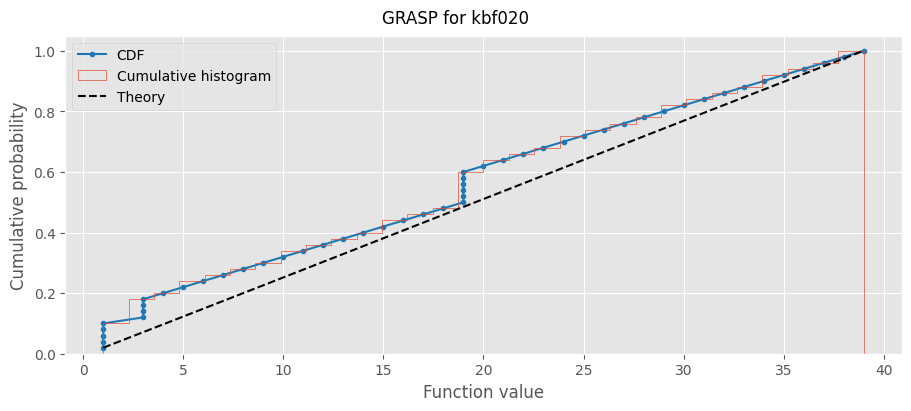

In [7]:
tttplots_graph(tttplots.loc[(tttplots['instancia'] == 'kbf020') & (tttplots['algoritmo'] == 'grasp')]['valor_qualidade'],
                        "GRASP for kbf020", 30, "Function value")

### Performance profile

In [14]:
# Para esse plot, considero todas as instâncias para a mesma técnica (vou ter uma linha por técnica com 7 pontos).
# Precisamos também de um valor target (melhor solução entre todas para aquela técnica).
# Calculamos a razão entre valor da solução e target (r), ordenamos estes valores e construímos o performance profile
# (avaliando a prob(τ) = {qtd vezes que r <= τ}/n)

In [10]:
grasp = performance.loc[performance['tecnica'] == 'grasp']
tabu = performance.loc[performance['tecnica'] == 'tabu']
ga = performance.loc[performance['tecnica'] == 'ga']

grasp['target'] = 5
tabu['target'] = 3
ga['target'] = 7

grasp['razao'] = np.round(grasp['valor'] / grasp['target'], 1)
tabu['razao'] = np.round(tabu['valor'] / tabu['target'], 1)
ga['razao'] = np.round(ga['valor'] / ga['target'], 1)

/tmp/ipykernel_108761/3526891740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grasp['target'] = 5
/tmp/ipykernel_108761/3526891740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabu['target'] = 3
/tmp/ipykernel_108761/3526891740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

Text(0.5, 1.0, 'Performance profile para cada algoritmo')

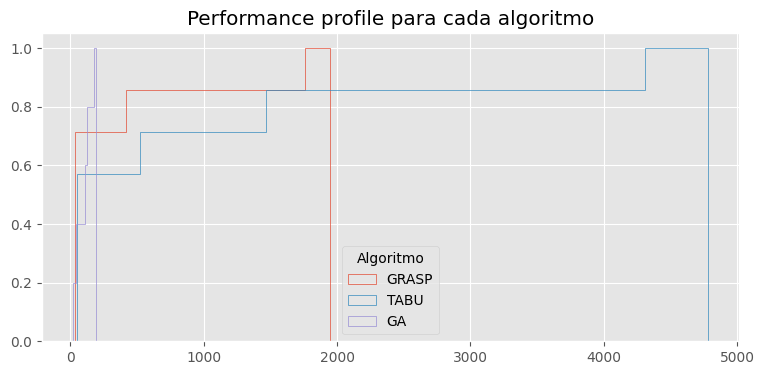

In [11]:
fig = plt.figure(figsize=(9, 4))
plt.hist(grasp['razao'], 10, density=True, histtype="step", cumulative=True, label="GRASP")
plt.hist(tabu['razao'], 10, density=True, histtype="step", cumulative=True, label="TABU")
plt.hist(ga['razao'], 10, density=True, histtype="step", cumulative=True, label="GA")
plt.legend(title='Algoritmo')
plt.title('Performance profile para cada algoritmo')